In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt, Hannanum, Kkma, Komoran, Mecab
from wordcloud import WordCloud
import pytagcloud
from collections import Counter
from IPython.display import Image
import re

pygame 2.5.2 (SDL 2.28.3, Python 3.11.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
df = pd.read_csv('./data/namsan_reviews_cleaned.csv')

In [3]:
# 한글 추출
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [4]:
df['review_text'] = df['review_text'].apply(lambda x: text_cleaning(x))

In [5]:
review_corpus = ''.join(df['review_text'])

In [6]:
tagger = Okt()
review_nouns = tagger.nouns(review_corpus)

In [7]:
word_count = Counter(review_nouns)

In [8]:
word_count.most_common(10)

[('산책', 108),
 ('곳', 88),
 ('남산', 47),
 ('공원', 45),
 ('수', 38),
 ('서울', 30),
 ('것', 25),
 ('장소', 23),
 ('정원', 23),
 ('꽃', 23)]

In [9]:
for e in ['곳', '수', '것', '아주']:
    word_count.pop(e)

In [10]:
word_count.most_common(10)

[('산책', 108),
 ('남산', 47),
 ('공원', 45),
 ('서울', 30),
 ('장소', 23),
 ('정원', 23),
 ('꽃', 23),
 ('식물원', 23),
 ('자연', 20),
 ('도심', 19)]

In [11]:
common_tags = word_count.most_common(50)

In [12]:
tag_list = pytagcloud.make_tags(common_tags)

In [13]:
import platform, os

def check_font_path():
    system_name = platform.system()
    if system_name == 'Darwin':
        font_path = '/Library/Fonts/Arial Unicode.ttf'
    elif system_name == 'Windows':
        font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
    elif system_name == 'Linux':
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    else:
        raise Exception('Unknown system name')
    if not os.path.isfile(font_path):
        raise Exception('File not found')
    return font_path

current_font_path = check_font_path()

In [14]:
wc = WordCloud(
    font_path=current_font_path,
    width=800,
    height=800,
    background_color='white',
)

In [17]:
wc.generate_from_frequencies(word_count)

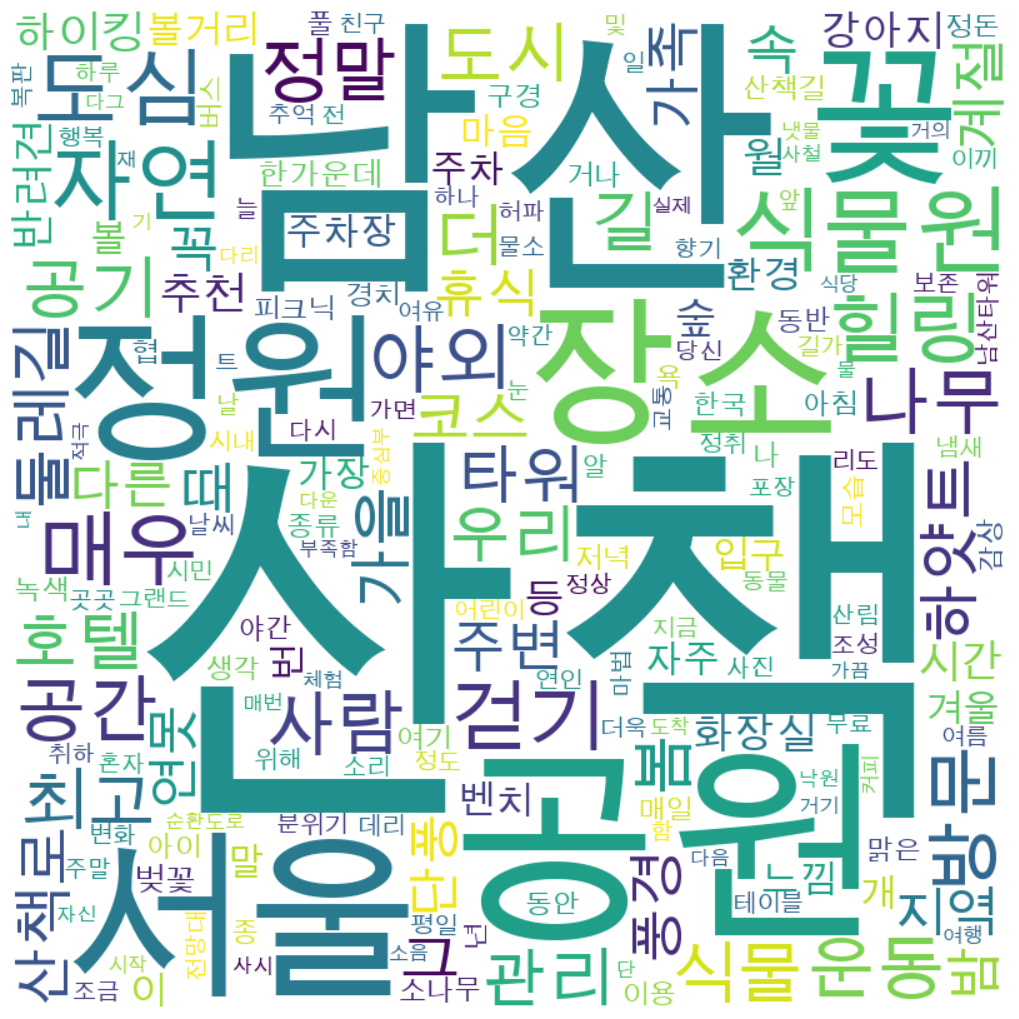

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('./result/namsan_wordcloud.png')
plt.show()